In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import measurements

def read_input(file='perc-ini.txt'):
    with open(file, 'r') as f:
        lines = f.readlines()
        L = int(lines[0].split('%')[0].strip())
        T = int(lines[1].split('%')[0].strip())
        p0 = float(lines[2].split('%')[0].strip())
        pk = float(lines[3].split('%')[0].strip())
        dp = float(lines[4].split('%')[0].strip())
    return L, T, p0, pk, dp

# Monte Carlo Simulation
def generate_lattice(L, p):
    return (np.random.rand(L, L) < p).astype(int)

def burning_method(lattice):
    L = lattice.shape[0]
    visited = np.zeros_like(lattice)
    stack = []
    for i in range(L):  
        if lattice[0, i] == 1:
            stack.append((0, i))
            visited[0, i] = 1

    while stack:
        x, y = stack.pop()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < L and 0 <= ny < L and lattice[nx, ny] == 1 and visited[nx, ny] == 0:
                visited[nx, ny] = 1
                stack.append((nx, ny))

    return visited[-1].any()  

def hoshen_kopelman(lattice):
    labeled, num_clusters = measurements.label(lattice)
    cluster_sizes = measurements.sum(lattice, labeled, index=np.arange(1, num_clusters + 1))
    return labeled, cluster_sizes

# Burning Algorithm Visualization
def visualize_burning(lattice):
    L = lattice.shape[0]
    visited = np.zeros_like(lattice)
    stack = []

    
    for i in range(L):
        if lattice[0, i] == 1:
            stack.append((0, i))
            visited[0, i] = 1

    while stack:
        x, y = stack.pop()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < L and 0 <= ny < L and lattice[nx, ny] == 1 and visited[nx, ny] == 0:
                visited[nx, ny] = visited[x, y] + 1
                stack.append((nx, ny))


    plt.figure(figsize=(6, 6))
    plt.title('Burning Algorithm Visualization')
    plt.imshow(visited, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Burning Step')
    plt.axis('off')
    plt.show()

# Hoshen-Kopelman Visualization
def visualize_hk(lattice):
    L = lattice.shape[0]
    labeled, num_clusters = measurements.label(lattice)
    cluster_labels = np.unique(labeled)

    cmap = plt.get_cmap('tab20', len(cluster_labels))
    
    plt.figure(figsize=(6, 6))
    plt.title('Hoshen-Kopelman Visualization')
    plt.imshow(labeled, cmap=cmap, interpolation='nearest')
    plt.colorbar(ticks=np.arange(len(cluster_labels)), label='Cluster Label')
    plt.axis('off')
    plt.show()


In [59]:
L_base, T, p0, pk, dp = read_input()
p_values = np.arange(p0, pk + dp, dp)


Visualizing Burning Algorithm for p = 0.4


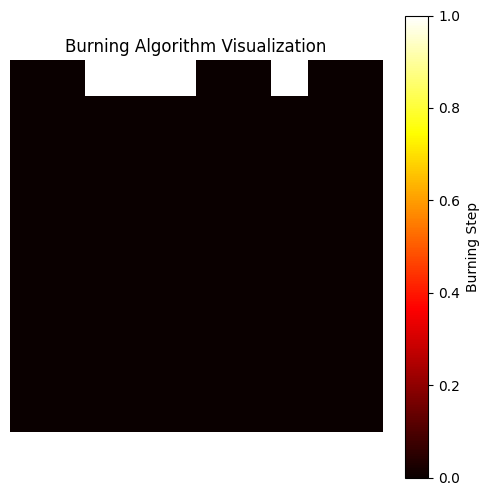

Visualizing HK Algorithm for p = 0.4


C:\Users\illia\AppData\Local\Temp\ipykernel_12320\4181796029.py:74: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labeled, num_clusters = measurements.label(lattice)


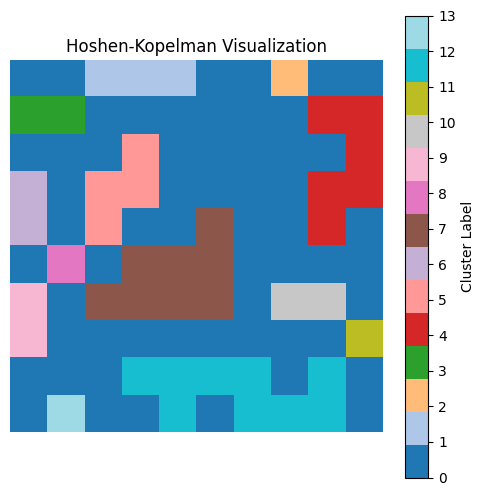

Visualizing Burning Algorithm for p = 0.6000000000000001


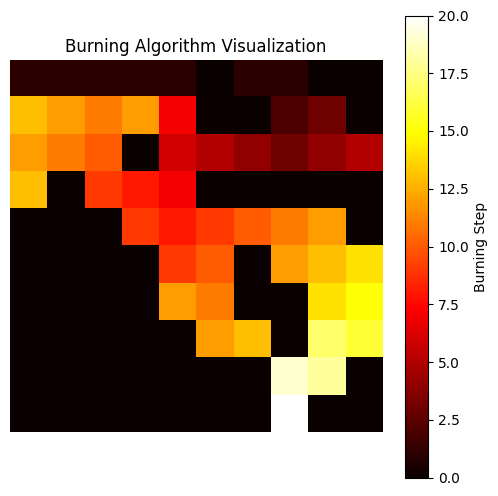

Visualizing HK Algorithm for p = 0.6000000000000001


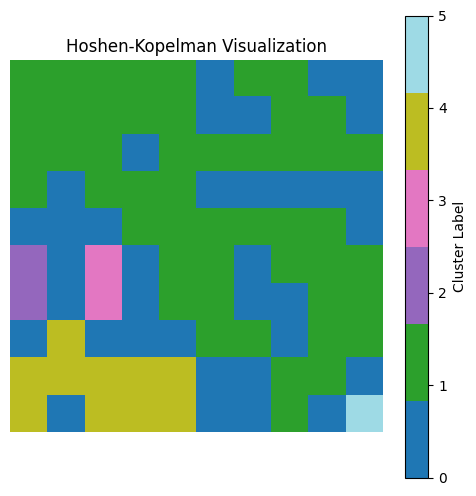

Visualizing Burning Algorithm for p = 0.8000000000000002


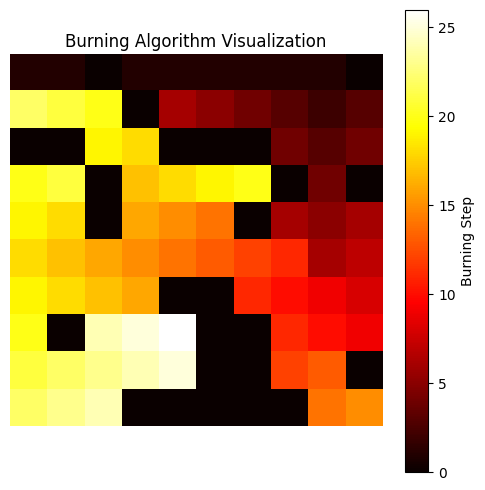

Visualizing HK Algorithm for p = 0.8000000000000002


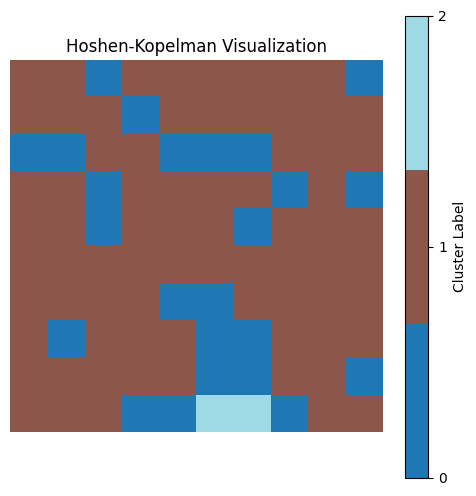

In [60]:
def main_visualization():

    for p in p_values:
        lattice = generate_lattice(L, p)

        print(f"Visualizing Burning Algorithm for p = {p}")
        visualize_burning(lattice)

        print(f"Visualizing HK Algorithm for p = {p}")
        visualize_hk(lattice)

main_visualization()


C:\Users\illia\AppData\Local\Temp\ipykernel_12320\4181796029.py:39: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labeled, num_clusters = measurements.label(lattice)
C:\Users\illia\AppData\Local\Temp\ipykernel_12320\4181796029.py:40: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  cluster_sizes = measurements.sum(lattice, labeled, index=np.arange(1, num_clusters + 1))


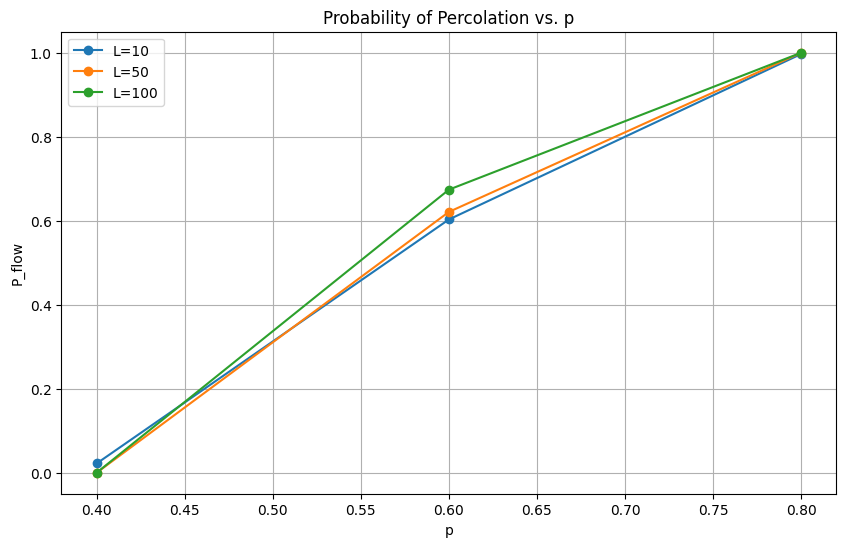

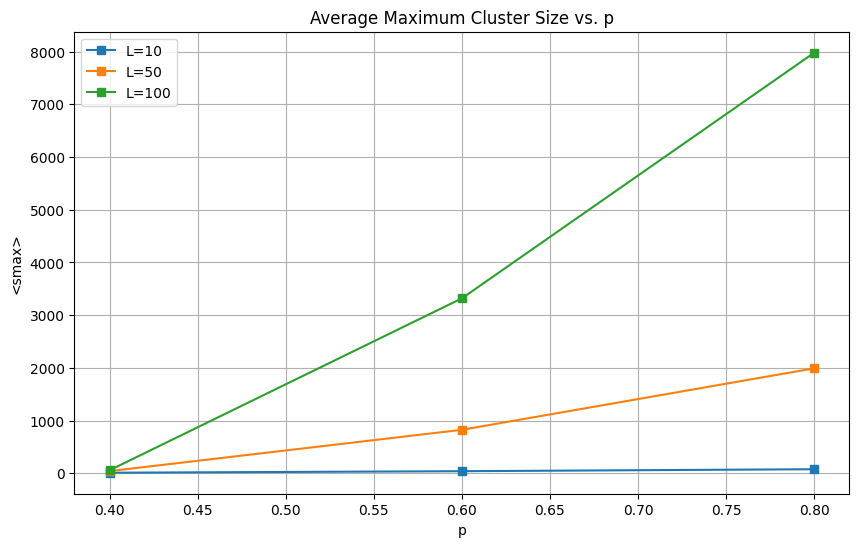

In [61]:
sizes = [L_base, L_base * 5, L_base * 10]
results = {}

for L in sizes:
    L = int(L)
    Pf_low = []
    s_max_values = []
    
    for p in p_values:
        flow_count = 0
        s_max_sum = 0

        for _ in range(T):
            lattice = generate_lattice(L, p)
            if burning_method(lattice):
                flow_count += 1

            _, cluster_sizes = hoshen_kopelman(lattice)
            if len(cluster_sizes) > 0:
                s_max_sum += cluster_sizes.max()

        Pf_low.append(flow_count / T)
        s_max_values.append(s_max_sum / T)
    
    results[L] = {'Pf_low': Pf_low, 's_max_values': s_max_values}

plt.figure(figsize=(10, 6))

for L in sizes:
    L = int(L) 
    plt.plot(p_values, results[L]['Pf_low'], marker='o', label=f'L={L}')

plt.xlabel('p')
plt.ylabel('P_flow')
plt.title('Probability of Percolation vs. p')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

for L in sizes:
    L = int(L) 
    plt.plot(p_values, results[L]['s_max_values'], marker='s', label=f'L={L}')

plt.xlabel('p')
plt.ylabel('<smax>')
plt.title('Average Maximum Cluster Size vs. p')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\illia\AppData\Local\Temp\ipykernel_12320\4181796029.py:39: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labeled, num_clusters = measurements.label(lattice)
C:\Users\illia\AppData\Local\Temp\ipykernel_12320\4181796029.py:40: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  cluster_sizes = measurements.sum(lattice, labeled, index=np.arange(1, num_clusters + 1))


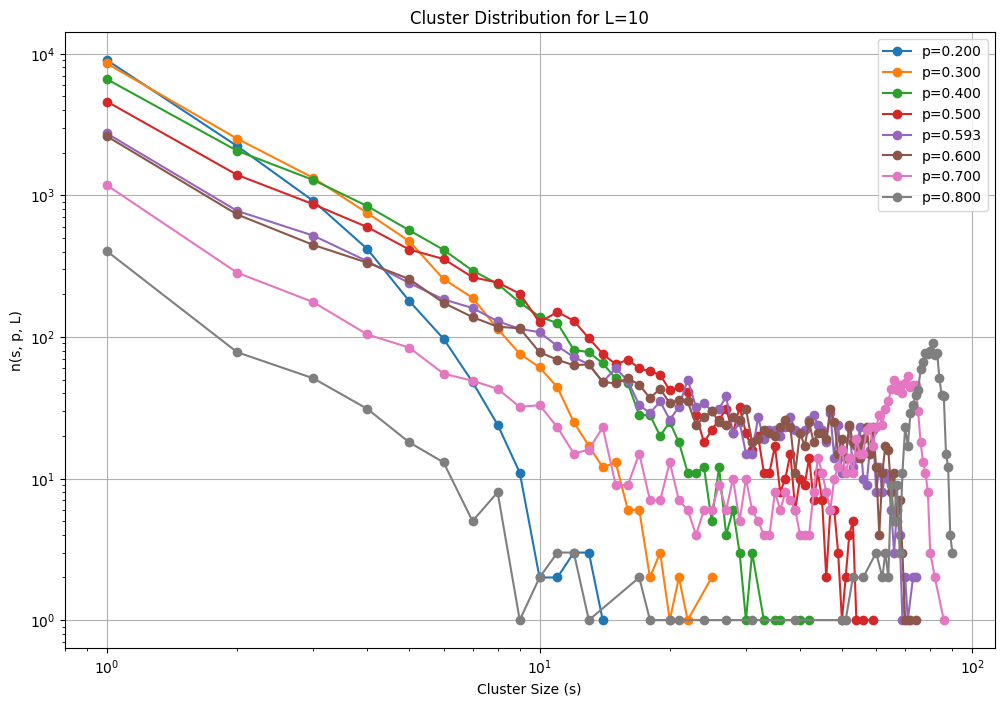

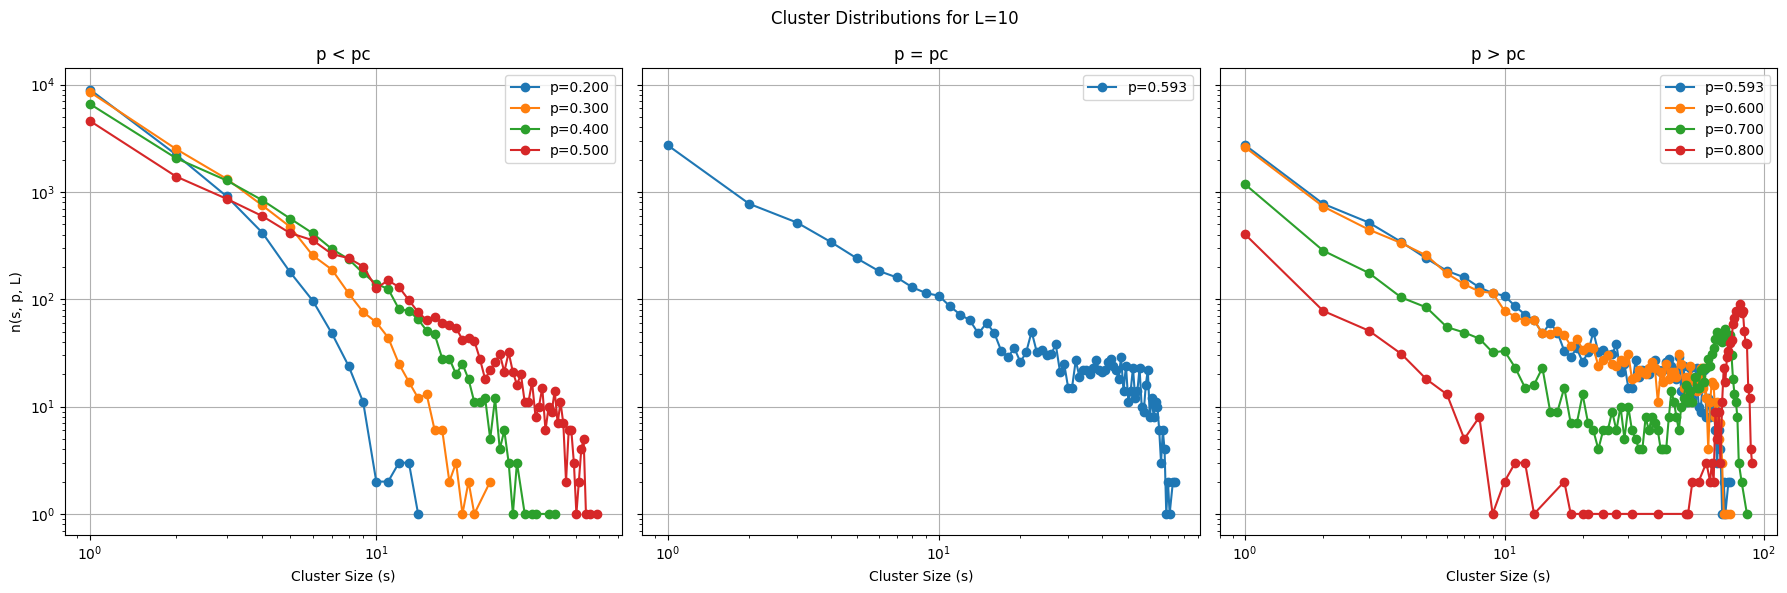

In [62]:
L = 10
p_values = [0.2, 0.3, 0.4, 0.5, 0.592746, 0.6, 0.7, 0.8]

# Monte Carlo Trials
results = {}
for p in p_values:
    p_key = round(p, 5)  
    flow_count = 0
    s_max_sum = 0
    cluster_sizes = []

    for _ in range(T):
        lattice = generate_lattice(L, p_key)
        if burning_method(lattice):
            flow_count += 1

        _, sizes = hoshen_kopelman(lattice)
        cluster_sizes.extend(sizes[sizes > 0])  

    Pf_low = flow_count / T
    s_max_avg = s_max_sum / T if s_max_sum > 0 else 0
    unique_sizes, counts = np.unique(cluster_sizes, return_counts=True)
    results[p_key] = {'Pf_low': Pf_low, 's_max_values': s_max_avg, 'cluster_distribution': (unique_sizes, counts)}

p_values = [round(p, 5) for p in p_values]

plt.figure(figsize=(12, 8))
for p in p_values:
    if p in results:  
        unique_sizes, counts = results[p]['cluster_distribution']
        plt.plot(unique_sizes, counts, marker='o', label=f'p={p:.3f}')
    else:
        print(f"Warning: p={p} not found in results.")

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cluster Size (s)')
plt.ylabel('n(s, p, L)')
plt.title(f'Cluster Distribution for L={L}')
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

groups = {
    'p < pc': [p for p in p_values if p < 0.592746],
    'p = pc': [p for p in p_values if abs(p - 0.592746) < 1e-5],
    'p > pc': [p for p in p_values if p > 0.592746],
}

for ax, (title, p_group) in zip(axes, groups.items()):
    for p in p_group:
        if p in results:
            unique_sizes, counts = results[p]['cluster_distribution']
            ax.plot(unique_sizes, counts, marker='o', label=f'p={p:.3f}')
        else:
            print(f"Warning: p={p} not found in results.")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Cluster Size (s)')
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

axes[0].set_ylabel('n(s, p, L)')
fig.suptitle(f'Cluster Distributions for L={L}')
plt.tight_layout()
plt.show()
